# 2. Flow in one-dimension (1D) 

## Preamble

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad
from scipy.interpolate import InterpolatedUnivariateSpline as interpolate
from scipy.optimize import root
from scipy.misc import derivative

import sympy as sp
from ipywidgets import interact

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import fractions as fra
%run -i "rcParameters.py"

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix';

In [3]:
# set fontsize in markdown cells
from IPython.core.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

## 2 Flows on the line

### 2.1  A geometric way of thinking 

Consider the 1D, nonlinear ODE $\dot{x}\equiv dx/dt=\sin(x)$, subject to initial condition (IC) $x(0)=x_0$. 

#### __Analytical solution:__ 

$x(t)=2 \arctan[e^t \tan(x_0/2)]$

__Tasks__: __(1)__ Plot $x(t)$, and __(2)__ determine $\lim_{t\rightarrow\infty}x(t)$

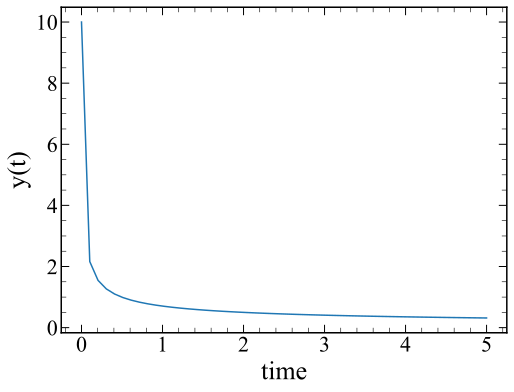

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dx/dt
def model(y,t):
    dydt = -y**3 
    return dydt

# initial condition
y0 = 10

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

#### __Numerical solution__

of the equation $\dot{x}\equiv dx/dt=\sin(x)$, with IC $x(0)=x_0$, using _scipy_'s __odeint__ function.

This approach can be used to solve arbitrary, scalar or matrix, 1D ODEs!

In [5]:
# t --> x_sol(x0) = x(t;x0) 
t = np.arange(0,5,0.1)
x_sol = lambda x0: odeint(lambda x,t: np.sin(x),x0,t)

Plot the solution for different initial conditions

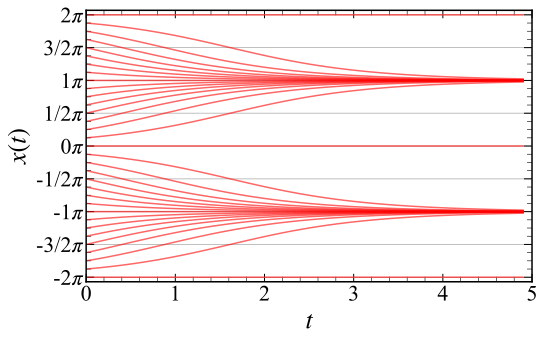

In [6]:
# plot x_sol(x0) vs t for different ICs (various values of x0)
fig, ax = plt.subplots(figsize=(8,5))
for x0 in np.arange(-2*np.pi,2.1*np.pi,np.pi/8):
    ax.plot(t,x_sol(x0),'r-',lw=1.5,alpha=0.6)
ax.set_xlim(0,5)
tp = np.arange(-2*np.pi, 2*np.pi+0.1, np.pi/2)
ax.set_yticks(tp)
ax.set_yticklabels([str(fra.Fraction(i/np.pi))+'$\pi$' for i in tp])
ax.set_ylim(-6.5,6.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(axis='y',which='major');

__Conclusion:__
<div class="alert alert-block alert-success">
 for $x_0\in (2n\,\pi, 2(n+1)\,\pi)\;$ and $n\in\mathbb{Z},\;\;\; x(t)\rightarrow (2n+1)\,\pi\;$ 
    as $t \rightarrow \infty\;$   
</div>

#### __Geometrical (qualitative) solution__
1D vector flow field on the line 

___Phase portrait___: plot of $\dot{x}$ vs $x$ 

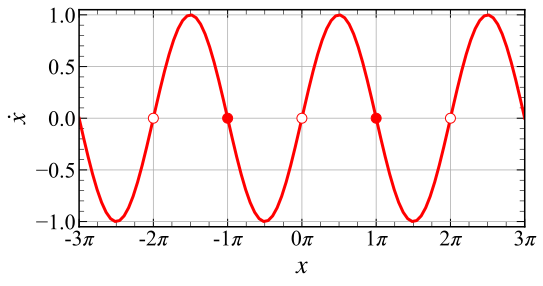

In [7]:
x1 = 3*np.pi; xx = np.linspace(-x1,x1,100)
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(xx,np.sin(xx),'r-',lw=3)
ax.set_xlim(-x1,x1)
tp = np.arange(-x1,1.05*x1, np.pi)
ax.set_xticks(tp)
ax.set_xticklabels([str(fra.Fraction(i/np.pi))+'$\pi$' for i in tp])
ax.set_yticks(np.arange(-1,1.1,0.5))
ax.set_ylim(-1.05,1.05)
ax.set_xlabel('$x$')
ax.set_ylabel('$\dot{x}$')
ax.grid()
# show the fixed points f(x*)=0
for xr,yr in zip(np.arange(-2*np.pi,3*np.pi,np.pi),np.zeros(5)):
    if derivative(np.sin,xr)>0: # unstable fixed point
        ax.plot(xr,yr,'o',mfc='w',mec='r',ms=10)
    else:                       # stable fixed point
        ax.plot(xr,yr,'o',mfc='r',mec='r',ms=10)

__Conclusion__
<div class="alert alert-block alert-success">
    
- fixed points (FPs):  $\;x^*_n=n\,\pi\;,\quad n\in\mathbb{Z}$
    
- $f'(x^*_n)=\cos(n\,\pi)=(-1)^n \Rightarrow \quad x^*_n$ stable (unstable) FP if $n$ is odd (even)
</div>

#### Example 2.2.1

<div class="alert alert-block alert-info">
Find all fixed points of the 1D dynamics system $\dot{x}=f(x)\equiv x^2-1$
</div>

In [8]:
# function to determine the stability and then plot the fixed point (FP) x
# closed (open) circle represents stable (unstable) FP
def show_FP(x,fp,ax,col='r',mec='r',ms=10):
    ax = ax or plt.gca()
    if fp>0: # unstable fixed point
        ax.plot(x,0,'o',mfc='w',mec=mec,ms=ms)
    else:                       # stable fixed point
        ax.plot(x,0,'o',mfc=col,mec=mec,ms=ms)
    return ax    

Fixed point at x = -1.0
Fixed point at x = 1.0


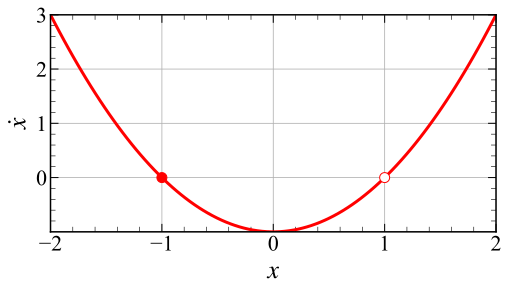

In [9]:
# define f(x)
f = lambda x: x**2-1
# generate the data: x and f(x) 
x1 = 2; xx = np.linspace(-x1,x1,100)
yy = f(xx); y_b = yy.max(); y_a = yy.min()
# plot dx/dt=f(x) vs x
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(xx,f(xx),'r-',lw=3)
ax.set_xlim(-x1,x1)
ax.set_ylim(y_a,y_b)
ax.set_xlabel('$x$')
ax.set_ylabel('$\dot{x}$')
ax.grid()
# show the fixed point x* [obtained from f(x*)=0]
x_FP = root(f,[-x1,x1]).x
for z in x_FP:
    print('Fixed point at x =',round(z,2))
    fp_FP = derivative(f,z)
    show_FP(z,fp_FP,ax);

#### Example 2.2.3

<div class="alert alert-block alert-info">
Find all fixed points of the 1D dynamics system $\dot{x}=f(x)\equiv x-\cos(x)$
</div>

In [10]:
# function to determine the stability and then plot the fixed point (FP) x
# closed (open) circle represents stable (unstable) FP
def show_FP(x,fp,ax,col='r',mec='r',ms=10):
    ax = ax or plt.gca()
    if fp>0: # unstable fixed point
        ax.plot(x,0,'o',mfc='w',mec=mec,ms=ms)
    else:                       # stable fixed point
        ax.plot(x,0,'o',mfc=col,mec=mec,ms=ms)
    return ax    

Fixed point at x = 0.7391


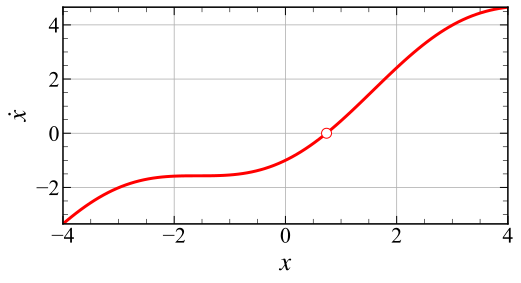

In [11]:
# define f(x)
f = lambda x: x-np.cos(x)
# generate the data: x and f(x) 
x1 = 4; xx = np.linspace(-x1,x1,100)
yy = f(xx); y_b = yy.max(); y_a = yy.min()
# plot dx/dt=f(x) vs x
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(xx,f(xx),'r-',lw=3)
ax.set_xlim(-x1,x1)
ax.set_ylim(y_a,y_b)
ax.set_xlabel('$x$')
ax.set_ylabel('$\dot{x}$')
ax.grid()
# show the fixed point x* [obtained from f(x*)=0]
x_FP = root(f,0).x[0]
print('Fixed point at x =',round(x_FP,4))
fp_FP = derivative(f,x_FP)
show_FP(x_FP,fp_FP,ax);

### 2.3 Population growth: the _logistic equation_

Simple model for population growth: $x(t)\equiv N(t)$ is the population as function of time.

- 1D dynamical equation: $\dot{N}=r N$, where $r$ is the _growth rate_. 

    - for constant growth rate: $N(t)=N(0)\,e^{r t}$, which diverges for $t\rightarrow\infty$ !

    - in general, $r=r(N)$ and decreases with the increase of $N$. Clearly, $N(t)$ increases (decreases) when $r>0$ ($r<0$), and $r$ is called _birth_ (_death_) rate.

    - the ___carrying capacity___ , $K$, is the population where the rate vanishes, i.e., $r(K)=0$.

- in the simplest (linear) approximation $r(N) \approx r(1-N/K)$, where $r\equiv r(0)$.

- the resulting population grow equation is called the ___logistic equation___

\begin{equation} 
\dot{N} = r N (1-N/K)\;,\quad \text{with IC}\;N(0)=N_0 
\label{LMap}
\end{equation}

- the equation can be solved analytically
\begin{equation}
N(t) = N_0 [(1-N_0/K)e^{-r t}+N_0/K]^{-1} 
\label{sol-LMap}
\end{equation} 

<div class="alert alert-block alert-success">
 Because $\lim_{t\rightarrow\infty}N(t)=K$ for any $N(0)>0$, there must be a stable fixed point at $N^*=K$.
</div>

__Dimensionless units__
The logistic equation can be cast in _dimensionless units_, e.g., by measuring (i) time in units of $\tau=1/r$, i.e., $t\rightarrow t/\tau=t\,r$, and (ii) populations in units of $K$, i.e., $N\rightarrow N/K$ and $N_0\rightarrow N_0/K$. Thus, Eqs. \eqref{LMap} and \eqref{sol-LMap} become 

\begin{equation}
\dot{N}=N(1-N)\;,\quad N(0)=N_0\;,
\end{equation}

\begin{equation}
N(t)=N_0/[(1-N_0)e^{-t}+N_0]\;.
\end{equation}

__Note__: Formally, one can switch to dimensionless units by setting the chosen time and population units equal to one, i.e., $r\rightarrow 1$ and $K\rightarrow 1$. 

#### Plot $N(t)$ for various $N_0$, using dimensionless units

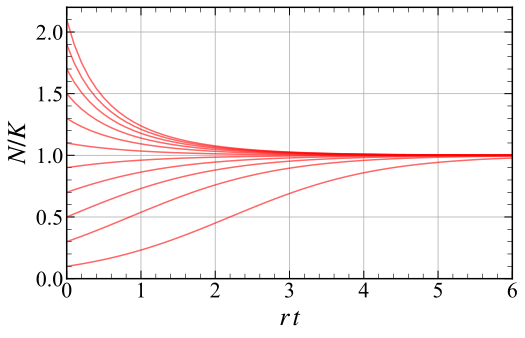

In [12]:
# plot N(t|N0)
NK = lambda t,N0: N0/((1-N0)*np.exp(-t)+N0)
tt = np.arange(0,6.1,0.1)
fig, ax = plt.subplots(figsize=(8,5))
for n0 in np.arange(0.1,2.2,0.2):
    ax.plot(tt,NK(tt,n0),'r-',lw=1.5,alpha=0.6)
ax.grid(axis='both')  
ax.set_xlim(0,6)
ax.set_ylim(0,)
ax.set_xlabel('$r\,t$')
ax.set_ylabel('$N/K$')
plt.show()

#### Construct the _phase portrait_ (i.e., plot $\dot{N}$ vs $N$) and identify the fixed points

Fixed point at N/K = 0
Fixed point at N/K = 1


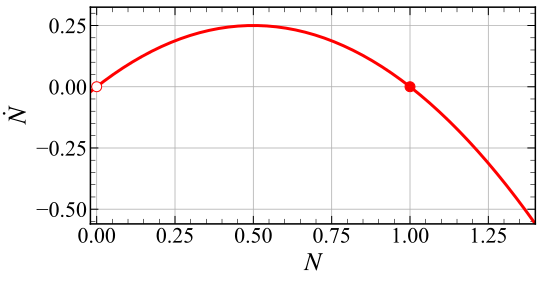

In [13]:
# phase portrait dN/dt vs N
# define f(x)
f = lambda x: x*(1-x)
# generate the data: x and f(x) 
x1 = -0.1; x2=1.4 
xx = np.linspace(x1,x2,50)
yy = f(xx); y1 = yy.min(); y2 = 1.3*yy.max()
# plot dx/dt=f(x) vs x
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(xx,f(xx),'r-',lw=3)
ax.set_xlim(-0.02,x2)
ax.set_ylim(y1,y2)
ax.set_xlabel('$N$')
ax.set_ylabel('$\dot{N}$')
ax.grid()

# show the fixed point x* [obtained from f(x*)=0]
x_FP = root(f,[x1,x2]).x
for z in x_FP:
    print('Fixed point at N/K =',round(z))
    fp_FP = derivative(f,z)
    show_FP(z,fp_FP,ax);

__Conclusion__
<div class="alert alert-block alert-success">
    
-  $N^*=0$ is an unstable fixed point 
    
-  $N^*=K$ is a stable fixed point   
</div>

### Example 2.8.1  Slope field

<div class="alert alert-block alert-info">
Solve the (1D dynamical) system $\dot{x}=x(1-x)$ (i.e., the _logistic equation_ in dimensionless units) numerically, and plot $x$ vs $t$ for different initial conditions.
</div>

The requested plot can be cast as a ___slope field___ [or _"stream plot"_ or _"streamline plot"_ used to visualize 2D vector fields] of the system in the $(t,x)$ plane. To create a slope field one generates a rectangular grid in $(X=t,Y=x)$, and on each node one draws a "velocity" vector $(u=\dot{X},v=\dot{Y})\equiv(dt/dt=1,dx/dt=f(x))=(1,f(x))$. For sufficiently dense grid, the velocity vectors define a set of continuous streamlines. Because $(u,v)$ is tangent to $x(t)$ at $t$, each streamline will represent a solution $x(t)$ corresponding to a particular initial condition $x(0)$.

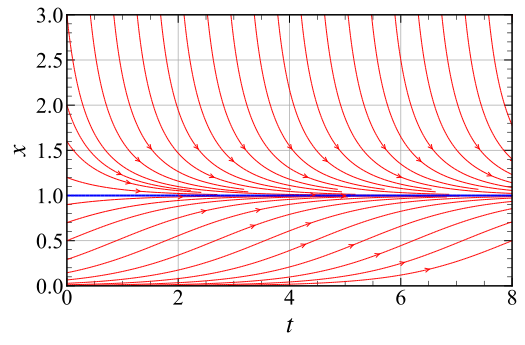

In [14]:
# plot x(t|x0) as stream-plot
# define f(x)
f = lambda x: x*(1-x)
# plot the slope field 
xx=np.arange(0,10.2,0.1)
yy=np.arange(0,3.1,0.05)
X,Y = np.meshgrid(xx,yy)

fig, ax0=plt.subplots(figsize=(8,5))

x0 = np.linspace(0,8,20)
y0 = np.ones(len(x0))*3
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=4,
               linewidth=1,color='red',arrowstyle='->')

x0 = np.linspace(0,8,10)
y0 = np.ones(len(x0))*0.5
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=10,
               linewidth=1,color='red',arrowstyle='->')

y0 = [0.7,0.9,1.2,1.6,2]
x0 = np.zeros(len(y0))
seed_points=np.array([x0,y0])
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=seed_points.T,density=5,
               linewidth=1,color='red',arrowstyle='->')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,1]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

ax0.grid(axis='both')  
ax0.set_xlim(0,8)
ax0.set_ylim(0,3)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$x$')
# fig.savefig('FIGS/LE_streamplot.pdf')
plt.show()

Check that: 

(1) `streamplot` give $x(t)$ for various initial conditions 

(2) `quiver` can be used to generate `slope field` plots

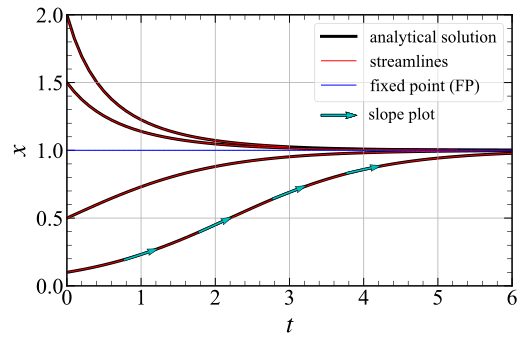

In [15]:
# x(t|x0) stream-plot vs slope plot (quiver)
# analytic solution of the logistic model: x = N(t|N0) [K=1]
NK = lambda t,N0: N0/((1-N0)*np.exp(-t)+N0)
vNK= np.vectorize(NK)
# define f(x)
f = lambda x: x*(1-x)
# generate 2D grid [t,x]
xx=np.arange(0,10.2,0.1)
yy=np.arange(0,3.1,0.05)
X,Y = np.meshgrid(xx,yy)

# plot N(t;N0), t-x streamlines, slope-field (quiver)
fig, ax0=plt.subplots(figsize=(8,5))

# N(t;N0) for select IC
n0 = [0.1,0.5,1.5,2.]
for i in n0:
    ax0.plot(xx,NK(xx,i),'k-',lw=3,alpha=1,zorder=1)

# sreamplot for selected IC
y0 = n0
x0 = np.zeros(len(y0))
seed_points=np.array([x0,y0])
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=seed_points.T,density=10,
               linewidth=1,color='red',arrowstyle='-')
# FP streamline
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,1]],density=5,
               linewidth=1,color='blue',arrowstyle='-')

# slope plot for selected IC
xq = [1,2,3,4]
yq = vNK(xq,0.1)
uq = np.ones(len(xq))
vq = f(yq)
Q = ax0.quiver(xq,yq,uq,vq, pivot='mid', scale=2, scale_units='inches',angles='xy'
           ,width=0.005,headwidth=3,headlength=5,fc='c',ec='k',lw=0.5,zorder=3)
ax0.quiverkey(Q, 0.63, 0.6, 1, ' slope plot', labelpos='E',
                   coordinates='figure',fontproperties={"size": 17})

ax0.grid(axis='both')  
ax0.set_xlim(0,6)
ax0.set_ylim(0,2)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$x$')

# add legends by hand
black_line = mpl.lines.Line2D([], [], color='black', lw=3, label='analytical solution')
red_line   = mpl.lines.Line2D([], [], color='red', lw=1, label='streamlines')
blue_line  = mpl.lines.Line2D([], [], color='blue', lw=1, label='fixed point (FP)')
ax0.legend(handles=[black_line,red_line,blue_line],framealpha=0.6)

# fig.savefig('FIGS/LE_streamplot-quiver.pdf')
plt.show()

`Slope field` plot combined with `streamplot`

(_Note: slope field arrows can be removed by uncommenting line 35_)

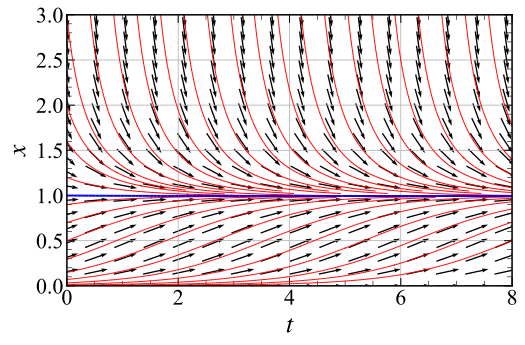

In [16]:
# plot x(t|x0) as stream-plot
# define f(x)
f = lambda x: x*(1-x)
# plot the slope field 
xx=np.linspace(0,10,20)
yy=np.linspace(0,3,20)
X,Y = np.meshgrid(xx,yy)

fig, ax0=plt.subplots(figsize=(8,5))

x0 = np.linspace(0,8,20)
y0 = np.ones(len(x0))*3
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=4,
               linewidth=1,color='red',arrowstyle='-')

x0 = np.linspace(0,8,10)
y0 = np.ones(len(x0))*0.5
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=10,
               linewidth=1,color='red',arrowstyle='-')

y0 = [0.7,0.9,1.2,1.6,2]
x0 = np.zeros(len(y0))
seed_points=np.array([x0,y0])
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=seed_points.T,density=5,
               linewidth=1,color='red',arrowstyle='-')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,1]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

U = 1+0*X; V = f(Y)
NU = np.sqrt(U**2+V**2)
ax0.quiver(X,Y,U/NU,V/NU, pivot='mid',angles='xy', scale=3, scale_units='inches'
#             ,headlength=0, headaxislength=0,zorder=3
          )

ax0.grid(axis='both')  
ax0.set_xlim(0,8)
ax0.set_ylim(0,3)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$x$')
# fig.savefig('FIGS/LE_slope-field.pdf')
plt.show()